# K-Means

EM Algorithm

Unsupervised Learning의 한 종류이다. 이제 라벨링이 필요없다.


언어 쪽에서는 담화 분석에 쓰일 수 있다. ( Topic 분류 ) 


1. 먼저 latent factor K를 설정한다.

2. K개의 임의의 latent factor로 부터 가장 가까운 포인트를 찾는다. 
     제대로된 centroid라는 가정이 아니기에, optimal한 쪽으로 centroid를 이동시켜준다. 
     
3. 그리고 다시 계산하고 assign하고 maximize 한다. 이 과정을 EM과정이라고 한다. 





$J = \sum_{n=1}^N \sum_{k=1}^K r_{n,k} ||x_n - \mu_k||^2$

n번째가 k에 포함되는지 아닌지가 $r_{n,k}$에 들어간다. 

$\mu_k$ 는 cluster의 중심값, centroid가 된다. 

$\mu_k$를 optimize하고 $r_{n,k}$를 변경하는 과정을 계속 반복한다. ( 하나 실행하면 다른 하나가 바뀌기 때문 / interacting 하다. )


* EM ( Expectation and Maximization )

$J = \sum_{n=1}^N \sum_{k=1}^K r_{n,k} ||x_n - \mu_k||^2$

1. Expectation

파라미터에 대한 log-likelihood를 예측하는 것.  ( = $r_{n,k}$ )

centroid에 가까운 것에 대해 0,1로 assign 할 것 ( 여기서는 거리 )

( 0,1로 분류하는 것은 Hard Clustering이라고 한다. 추후에 문제가 생길 수 있어서 0,1이 아닌 확률로 하는 Soft Clustering이 존재한다. )

2. Maximization

파라미터를 maximize해야함. ( = $\mu_k$ )

assign된 것들을 기준으로 가까운 순으로 centroid를 update해줘야함. 

--------

$\mu_k$ 에 대해 $J$를 편미분 하면 평균을 내는 것과 같은 식이 나온다. 

$\mu_k = \frac{\sum_{n=1}^N r_{n,k}x_n}{\sum_{n=1}^N r_{n,k}}$ 
 
 
하지만 K_Means는 Local Optimal에 빠질 위험이 크다. K가 랜덤이기 때문에, K & Centroid를 계속 바꿔가며 실험해야한다. 
 
 

In [73]:
# K-Means Clustering 만들기
# K, centroid, data= random

import random

# examples
data = list()

# centroids
cluster = list()

K = 3

# data length
N = 100 

In [74]:
for i in range(N):
    data.append((random.randrange(0,N), random.randrange(0,N)))   # 0~N까지 임의의 1개 int
    
for i in range(K):
    cluster.append((random.randrange(0,N), random.randrange(0,N)))   # 0~N까지 임의의 1개 int

In [147]:
# data

In [76]:
cluster

[(19, 97), (58, 33), (86, 40)]

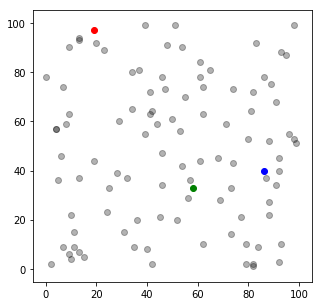

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
colorMap = ('r','g','b','k')

# datapoint
for i in range(N):
    plt.scatter(data[i][0],data[i][1],alpha=0.3,color=colorMap[-1])
    
# centroid
for i in range(K):
    plt.scatter(cluster[i][0],cluster[i][1],color=colorMap[i])
    
plt.show()

In [78]:
# 이제 EM만 진행하면 됨. 
from math import sqrt

# 두 점 사이의 거리재기
def euclidean(x,y):
    return sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    

In [79]:
def expectation(data, clusters):
    distance = list()
        
    for i in range(K):
        distance.append(euclidean(data,clusters[i]))
    return distance.index(min(distance))


In [80]:
# Randomly K=3, N=100, centroids(=cluster) => rnk 만들기

# [0,0,0] * 100 의 형태
rnk = list(list(0 for _ in range(K)) for _ in range(N))

for i in range(N):
    k = expectation(data[i],cluster)
    rnk[i][k] = 1
# 해당 index에 1 채움

for i in range(K):
    dataset = [data[j] for j in range(N) if rnk[j][i]]
    print(len(dataset))

24
44
32


In [81]:
def maximization(data):
    N = len(data)
    sumX = 0
    sumY = 0
    
    for i in data:
        sumX += i[0]
        sumY += i[1]
        
    return (sumX/N, sumY/N)  # x,y 좌표를 평균낸 것 

In [82]:
for i in range(K):
    dataset = [data[j] for j in range(N) if rnk[j][i]]
    cluster[i] = maximization(dataset)

In [83]:
cluster
# 이거로 다시 EM돌리는 것 반복 

[(26.541666666666668, 77.66666666666667),
 (38.52272727272727, 31.75),
 (85.71875, 48.03125)]

In [84]:
def sse(data,centroid):   # sum squared error
    _sum = 0.0
    
    for _ in data:
        _sum += euclidean(_,centroid)
        
    return _sum 

In [103]:
######## 다시 
from random import sample

cluster = sample(data,K)  # 3 포인트만 반환함 

Iteration:1 /  SSE:2821.6827816431037


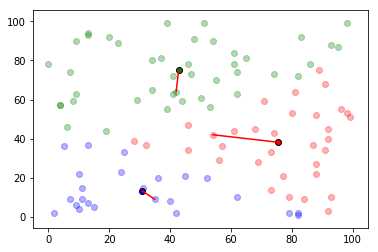

Iteration:2 /  SSE:2391.8109070325604


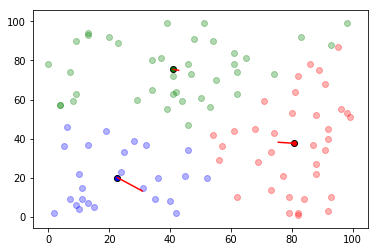

Iteration:3 /  SSE:2329.687253095697


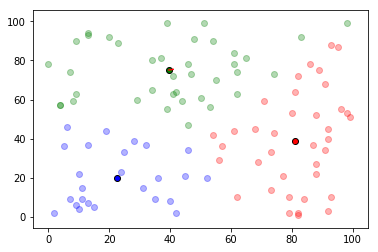

Iteration:4 /  SSE:2330.0705226650293


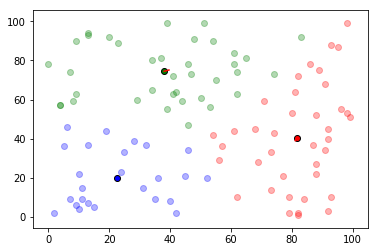

Iteration:5 /  SSE:2330.44218712346


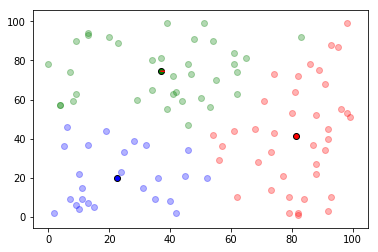

Iteration:6 /  SSE:2333.912934892684


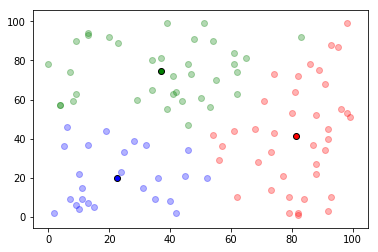

Iteration:7 /  SSE:2333.912934892684


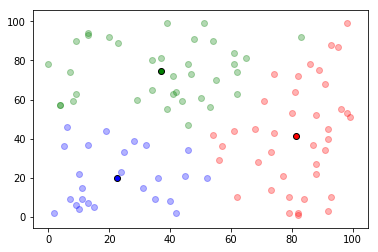

Iteration:8 /  SSE:2333.912934892684


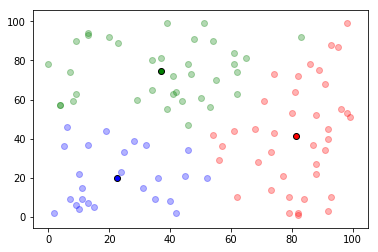

Iteration:9 /  SSE:2333.912934892684


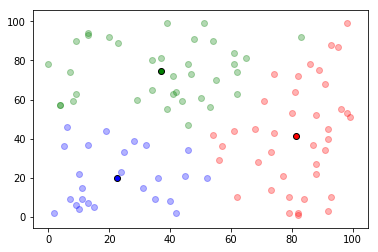

Iteration:10 /  SSE:2333.912934892684


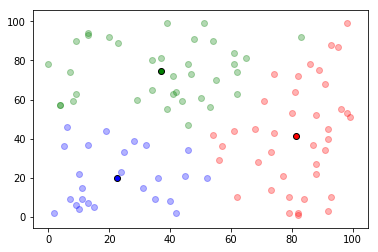

In [104]:
# iteration 돌기
iterCount = 10
sseList = list()

for _ in range(iterCount):
    rnk = list(list(0 for _ in range(K)) for _ in range(N))

    for i in range(N):
        k = expectation(data[i],cluster)
        rnk[i][k] = 1
    # 해당 index에 1 채움
    
    _sum = 0.0
    oldCluster = list()
    
    for i in range(K):
        dataset = [data[j] for j in range(N) if rnk[j][i]]
        _sum += sse(dataset,cluster[i])
        oldCluster.append(cluster[i])
        cluster[i] = maximization(dataset)
        
    print("Iteration:{0} /  SSE:{1}".format(_+1,_sum))

    for i in range(N):
        plt.scatter(data[i][0],data[i][1],alpha=0.3,color=colorMap[rnk[i].index(max(rnk[i]))])  # 1을 가지는 값의 Index를 찾아낸 것.  ( numpy argmax써도 됨 )
    
# centroid
    for i in range(K):
        plt.plot((oldCluster[i][0],cluster[i][0]),
                 (oldCluster[i][1],cluster[i][1]),'r-')
        plt.scatter(cluster[i][0],cluster[i][1],color=colorMap[i], edgecolors=colorMap[-1])

    plt.show()
    
    sseList.append(_sum)

In [105]:
sseList
# 떨어지다가 어느 지점에서 수렴한다. 

[2821.6827816431037,
 2391.8109070325604,
 2329.687253095697,
 2330.0705226650293,
 2330.44218712346,
 2333.912934892684,
 2333.912934892684,
 2333.912934892684,
 2333.912934892684,
 2333.912934892684]

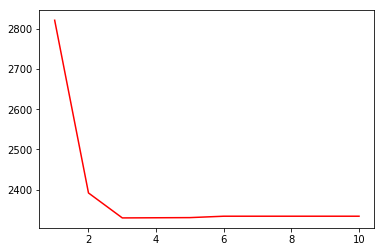

In [106]:
# 시각화
plt.plot(range(1,iterCount+1),sseList,'r-')
plt.show()

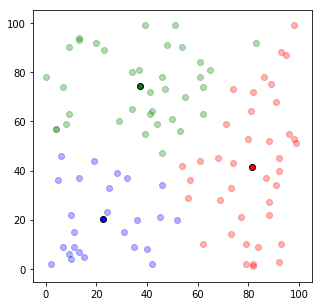

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
colorMap = ('r','g','b','k')

# datapoint
for i in range(N):
    plt.scatter(data[i][0],data[i][1],alpha=0.3,color=colorMap[rnk[i].index(max(rnk[i]))])  # 1을 가지는 값의 Index를 찾아낸 것.  ( numpy argmax써도 됨 )
    
# centroid
for i in range(K):
    plt.scatter(cluster[i][0],cluster[i][1],color=colorMap[i], edgecolors=colorMap[-1])
    
plt.show()

## K 바꿔가면서 보기

K:2
Iteration:1 /  SSE:3936.552414431547
Iteration:2 /  SSE:3176.565365938898
Iteration:3 /  SSE:3143.6009680363795
Iteration:4 /  SSE:3135.5804602507114
Iteration:5 /  SSE:3132.3913022132856
Iteration:6 /  SSE:3132.3913022132856
Iteration:7 /  SSE:3132.3913022132856
Iteration:8 /  SSE:3132.3913022132856
Iteration:9 /  SSE:3132.3913022132856
Iteration:10 /  SSE:3132.3913022132856


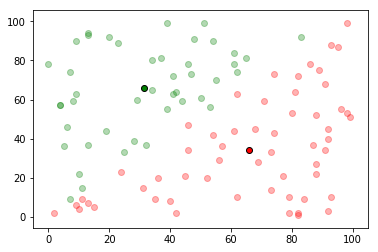

K:3
Iteration:1 /  SSE:4946.06385475828
Iteration:2 /  SSE:2892.887290711414
Iteration:3 /  SSE:2863.218431792416
Iteration:4 /  SSE:2846.0471231158735
Iteration:5 /  SSE:2856.6135069851252
Iteration:6 /  SSE:2863.5660073401727
Iteration:7 /  SSE:2857.7498361552534
Iteration:8 /  SSE:2849.4077739255517
Iteration:9 /  SSE:2846.6615145733003
Iteration:10 /  SSE:2850.5279017955836


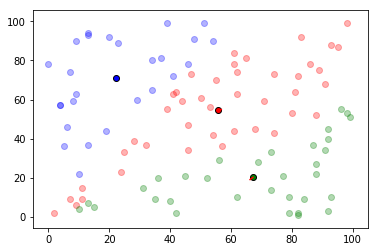

K:4
Iteration:1 /  SSE:3503.6464852387207
Iteration:2 /  SSE:2700.4430075738237
Iteration:3 /  SSE:2649.1958622043617
Iteration:4 /  SSE:2651.3276958613674
Iteration:5 /  SSE:2635.8988843117213
Iteration:6 /  SSE:2624.4339686546464
Iteration:7 /  SSE:2645.667113769792
Iteration:8 /  SSE:2644.684386809355
Iteration:9 /  SSE:2641.179934102919
Iteration:10 /  SSE:2641.179934102919


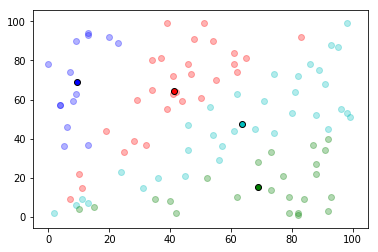

K:5
Iteration:1 /  SSE:3006.2962822877844
Iteration:2 /  SSE:2669.469880487732
Iteration:3 /  SSE:2639.6424270700295
Iteration:4 /  SSE:2626.194222641607
Iteration:5 /  SSE:2602.6184089512926
Iteration:6 /  SSE:2622.951297434198
Iteration:7 /  SSE:2643.168336481849
Iteration:8 /  SSE:2625.7855684446627
Iteration:9 /  SSE:2603.724749919016
Iteration:10 /  SSE:2590.203893419273


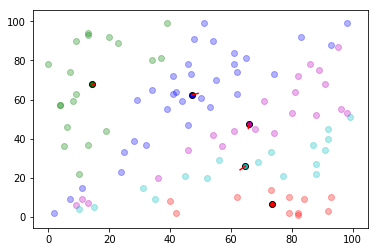

K:6
Iteration:1 /  SSE:4207.40151486069
Iteration:2 /  SSE:2618.6201167079807
Iteration:3 /  SSE:2573.839197976909
Iteration:4 /  SSE:2541.9539278614775
Iteration:5 /  SSE:2546.8384158606523
Iteration:6 /  SSE:2530.4050420936064
Iteration:7 /  SSE:2509.5194181226043
Iteration:8 /  SSE:2513.6251485894945
Iteration:9 /  SSE:2501.6514112167706
Iteration:10 /  SSE:2511.0956627848464


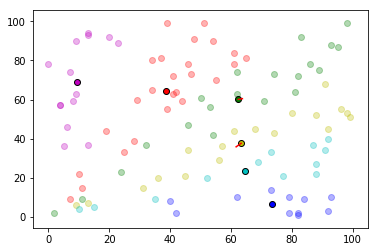

K:7
Iteration:1 /  SSE:3054.099577049565
Iteration:2 /  SSE:2542.403112815105
Iteration:3 /  SSE:2531.8445708868917
Iteration:4 /  SSE:2510.708534055137
Iteration:5 /  SSE:2505.2066183555976
Iteration:6 /  SSE:2475.3134820787914
Iteration:7 /  SSE:2483.2101816433437
Iteration:8 /  SSE:2478.772258450765
Iteration:9 /  SSE:2478.772258450765
Iteration:10 /  SSE:2478.772258450765


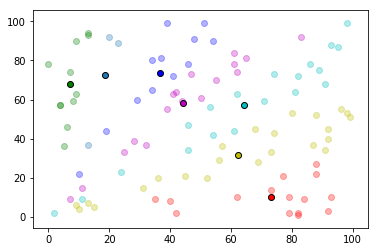

K:8
Iteration:1 /  SSE:3134.8923001027424
Iteration:2 /  SSE:2437.5015600518673
Iteration:3 /  SSE:2443.4152321432503
Iteration:4 /  SSE:2442.9165196665285
Iteration:5 /  SSE:2442.9165196665285
Iteration:6 /  SSE:2442.9165196665285
Iteration:7 /  SSE:2442.9165196665285
Iteration:8 /  SSE:2442.9165196665285
Iteration:9 /  SSE:2442.9165196665285
Iteration:10 /  SSE:2442.9165196665285


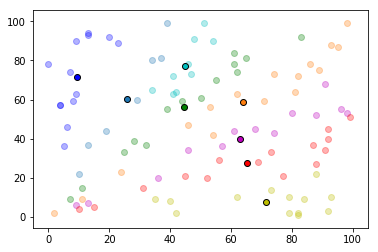

K:9
Iteration:1 /  SSE:3248.1962370536917
Iteration:2 /  SSE:2492.745137618363
Iteration:3 /  SSE:2423.4581591006186
Iteration:4 /  SSE:2426.898703349436
Iteration:5 /  SSE:2422.3305731685714
Iteration:6 /  SSE:2422.3305731685714
Iteration:7 /  SSE:2422.3305731685714
Iteration:8 /  SSE:2422.3305731685714
Iteration:9 /  SSE:2422.3305731685714
Iteration:10 /  SSE:2422.3305731685714


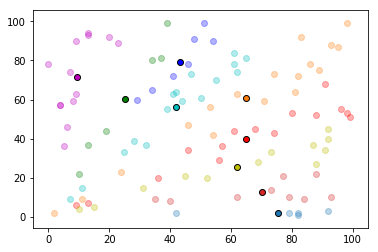

In [144]:
# iteration 돌기
from random import sample

iterCount = 10
sseList = list()
colorMap = ('r','g','b','c','m','y','C0','C1','C3','C4','C5','k')

for K in range(2,10):
    cluster = sample(data,K)
    print("K:{0}".format(K))
    for _ in range(iterCount):
        rnk = list(list(0 for _ in range(K)) for _ in range(N))

        for i in range(N):
            j = expectation(data[i],cluster)
            rnk[i][j] = 1
        # 해당 index에 1 채움

        _sum = 0.0
        oldCluster = list()

        for i in range(K):
            dataset = [data[j] for j in range(N) if rnk[j][i]]
            _sum += sse(dataset,cluster[i])
            oldCluster.append(cluster[i])
            cluster[i] = maximization(dataset)
            
        sseList.append(_sum)
    
        print("Iteration:{0} /  SSE:{1}".format(_+1,_sum))

    for i in range(N):
        plt.scatter(data[i][0],data[i][1],alpha=0.3,color=colorMap[rnk[i].index(max(rnk[i]))])  # 1을 가지는 값의 Index를 찾아낸 것.  ( numpy argmax써도 됨 )
        
# centroid
    for i in range(K):
        plt.plot((oldCluster[i][0],cluster[i][0]),
                 (oldCluster[i][1],cluster[i][1]),'r-')
        plt.scatter(cluster[i][0],cluster[i][1],color=colorMap[i], edgecolors=colorMap[-1])
        
       
    plt.show()

        

# Cosine으로 바꿔서 

In [132]:
def cosine(x,y):
    return (x[0]*y[0] + x[1]*y[1]) / (euclidean(x,(0,0)) * euclidean(y, (0,0)))

In [138]:
def expectation(data, clusters,cos=True):
    distance = list()
    metric = cosine if cos else euclidean
    rvalue = max if cos else min
    
    for i in range(K):
        distance.append(metric(data,clusters[i]))
    return distance.index(rvalue(distance))  # cosine이어서 Min이 아니라 Max / euclidean : min



K:2
Iteration:1 /  SSE:5121.445587032821
Iteration:2 /  SSE:3350.572503540543
Iteration:3 /  SSE:3252.9285048626516
Iteration:4 /  SSE:3212.2341002266503
Iteration:5 /  SSE:3158.9103138021073
Iteration:6 /  SSE:3141.9698318680457
Iteration:7 /  SSE:3135.5804602507114
Iteration:8 /  SSE:3132.3913022132856
Iteration:9 /  SSE:3132.3913022132856
Iteration:10 /  SSE:3132.3913022132856


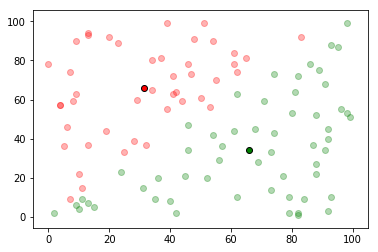

K:3
Iteration:1 /  SSE:4631.1307498765855
Iteration:2 /  SSE:2940.135092518036
Iteration:3 /  SSE:2883.996514567544
Iteration:4 /  SSE:2868.744504021707
Iteration:5 /  SSE:2854.6049087686984
Iteration:6 /  SSE:2866.1895837698
Iteration:7 /  SSE:2855.8491965288367
Iteration:8 /  SSE:2856.9974469855065
Iteration:9 /  SSE:2863.5660073401727
Iteration:10 /  SSE:2857.7498361552534


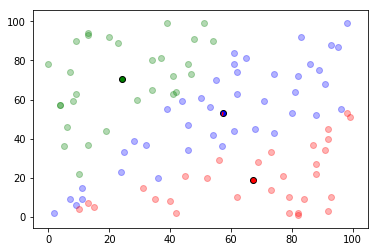

K:4
Iteration:1 /  SSE:4626.948709490393
Iteration:2 /  SSE:2834.4936964288013
Iteration:3 /  SSE:2712.3830563631973
Iteration:4 /  SSE:2649.413824484909
Iteration:5 /  SSE:2651.3276958613674
Iteration:6 /  SSE:2635.8988843117213
Iteration:7 /  SSE:2624.4339686546464
Iteration:8 /  SSE:2645.667113769792
Iteration:9 /  SSE:2644.684386809355
Iteration:10 /  SSE:2641.179934102919


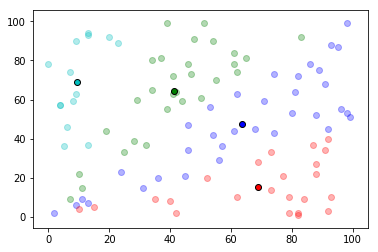

K:5
Iteration:1 /  SSE:4522.603332112389
Iteration:2 /  SSE:2609.36368000938
Iteration:3 /  SSE:2551.5791424957315
Iteration:4 /  SSE:2546.431168688012
Iteration:5 /  SSE:2544.990968197061
Iteration:6 /  SSE:2544.990968197061
Iteration:7 /  SSE:2544.990968197061
Iteration:8 /  SSE:2544.990968197061
Iteration:9 /  SSE:2544.990968197061
Iteration:10 /  SSE:2544.990968197061


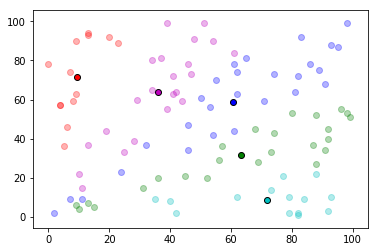

K:6
Iteration:1 /  SSE:4278.035378315916
Iteration:2 /  SSE:2588.5468826708466
Iteration:3 /  SSE:2514.0070813736884
Iteration:4 /  SSE:2514.6057927873467
Iteration:5 /  SSE:2508.7218550384923
Iteration:6 /  SSE:2526.7566998156863
Iteration:7 /  SSE:2509.045880213838
Iteration:8 /  SSE:2509.045880213838
Iteration:9 /  SSE:2509.045880213838
Iteration:10 /  SSE:2509.045880213838


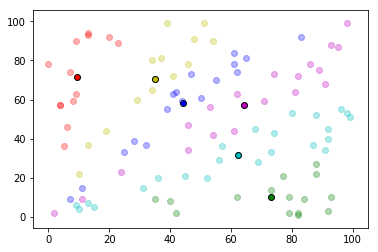

K:7
Iteration:1 /  SSE:3592.250160454648
Iteration:2 /  SSE:2677.7818796125234
Iteration:3 /  SSE:2574.3426807959145
Iteration:4 /  SSE:2540.057538070176
Iteration:5 /  SSE:2500.0466451930165
Iteration:6 /  SSE:2521.618385122506
Iteration:7 /  SSE:2483.329029710725
Iteration:8 /  SSE:2531.0791386582086
Iteration:9 /  SSE:2492.123868289321
Iteration:10 /  SSE:2478.516088272263


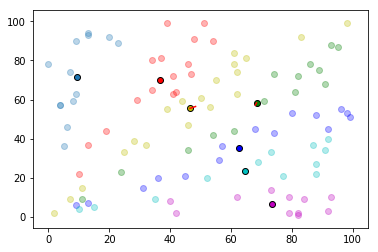

K:8
Iteration:1 /  SSE:3280.9619185833526
Iteration:2 /  SSE:2482.873777651723
Iteration:3 /  SSE:2485.026400742531
Iteration:4 /  SSE:2478.1088675090277
Iteration:5 /  SSE:2461.3952993971693
Iteration:6 /  SSE:2459.736648886382
Iteration:7 /  SSE:2451.3723752633327
Iteration:8 /  SSE:2455.8100557721186
Iteration:9 /  SSE:2456.3970537205078
Iteration:10 /  SSE:2456.3970537205078


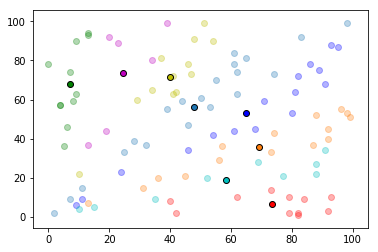

K:9
Iteration:1 /  SSE:3625.5088162581415
Iteration:2 /  SSE:2491.039290181625
Iteration:3 /  SSE:2407.466295121855
Iteration:4 /  SSE:2415.41960523499
Iteration:5 /  SSE:2416.5342920660432
Iteration:6 /  SSE:2395.0229618826825
Iteration:7 /  SSE:2407.735380677914
Iteration:8 /  SSE:2406.0164862858887
Iteration:9 /  SSE:2421.397184901659
Iteration:10 /  SSE:2436.6853674622885


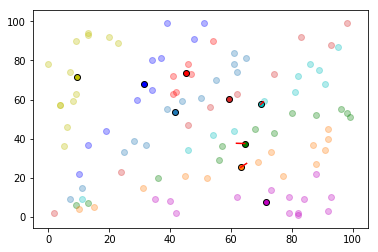

In [146]:
# iteration 돌기
from random import sample

iterCount = 10
sseList = list()
colorMap = ('r','g','b','c','m','y','C0','C1','C3','C4','C5','k')

for K in range(2,10):
    cluster = sample(data,K)
    print("K:{0}".format(K))
    for _ in range(iterCount):
        rnk = list(list(0 for _ in range(K)) for _ in range(N))

        for i in range(N):
            j = expectation(data[i],cluster,cos=True)
            rnk[i][j] = 1
        # 해당 index에 1 채움

        _sum = 0.0
        oldCluster = list()

        for i in range(K):
            dataset = [data[j] for j in range(N) if rnk[j][i]]
            _sum += sse(dataset,cluster[i])
            oldCluster.append(cluster[i])
            cluster[i] = maximization(dataset)
            
        sseList.append(_sum)
    
        print("Iteration:{0} /  SSE:{1}".format(_+1,_sum))

    for i in range(N):
        plt.scatter(data[i][0],data[i][1],alpha=0.3,color=colorMap[rnk[i].index(max(rnk[i]))])  # 1을 가지는 값의 Index를 찾아낸 것.  ( numpy argmax써도 됨 )
        
# centroid
    for i in range(K):
        plt.plot((oldCluster[i][0],cluster[i][0]),
                 (oldCluster[i][1],cluster[i][1]),'r-')
        plt.scatter(cluster[i][0],cluster[i][1],color=colorMap[i], edgecolors=colorMap[-1])
        
       
    plt.show()

        

# 문서에 적용하기

In [150]:
documents = [
    "This little kitty came to play when I was eating at a restaurant.",
    "Merley has the best squooshy kitten belly.",
    "Google Translate app is incredivle.",
    "If you open 100 tab in google you get a smiley face.",
    "Best cat photo I've ever taken.",
    "Climbing ninja cat.",
    "Impressed with google map feedback.",
    "Key promoter extension for Google Chrome."
]

In [153]:
# 다차원에 이용하기 위해서 변경
def euclidean(x,y):
    _sum = 0.0
    for i in range(len(x)):
        _sum += (x[i]-y[i]) ** 2  
    return sqrt(_sum)

In [157]:
def cosine(x,y):
    _sum = 0.0
    xLength =0.0
    yLength = 0.0
    
    for i in range(len(x)):
        _sum += x[i]*y[i]
        
    return _sum / (euclidean(x,[0 for _ in range(len(x))]) * euclidean(y,[0 for _ in range(len(x))]))

## 전처리

In [161]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import defaultdict

In [187]:
# DTM 만들기
# key : doc / val (Term:Freq)
DTM = defaultdict(lambda: defaultdict(int))
# key : Term / val (Doc:Freq)
TDM = defaultdict(lambda: defaultdict(int))
# key : Term / val (Doc:Weight)
TWM = defaultdict(lambda: defaultdict(float))

stopList = stopwords.words('english')

In [190]:
# i번째 doucument 내용 d
for i,d in enumerate(documents):
    for t in word_tokenize(d.lower()):  # 소문자로 변환된 구두점도 잘린 어절 리스트 
        if t not in stopList and not re.match(r"[{0}]".format(re.escape(punctuation)), t):
            DTM[i][t] += 1
            
for d, termList in DTM.items():
    for t,f in termList.items():
        TDM[t][d] = f
        
N = len(DTM)
V = len(TDM)

# TF-IDF
# TF : f / maxF
# IDF : N / df ( docList의 갯수)
from math import log

for t, docList in TDM.items():
    df = len(docList)
    for d,f in docList.items():
        maxtf = max(DTM[d].values())
        TWM[t][d] = (f/maxtf) * (log(N/df))

In [195]:
# 가중치 리스트 
TWM

defaultdict(<function __main__.<lambda>()>,
            {'little': defaultdict(float, {0: 2.0794415416798357}),
             'kitty': defaultdict(float, {0: 2.0794415416798357}),
             'came': defaultdict(float, {0: 2.0794415416798357}),
             'play': defaultdict(float, {0: 2.0794415416798357}),
             'eating': defaultdict(float, {0: 2.0794415416798357}),
             'restaurant': defaultdict(float, {0: 2.0794415416798357}),
             'merley': defaultdict(float, {1: 2.0794415416798357}),
             'best': defaultdict(float,
                         {1: 1.3862943611198906, 4: 1.3862943611198906}),
             'squooshy': defaultdict(float, {1: 2.0794415416798357}),
             'kitten': defaultdict(float, {1: 2.0794415416798357}),
             'belly': defaultdict(float, {1: 2.0794415416798357}),
             'google': defaultdict(float,
                         {2: 0.6931471805599453,
                          3: 0.6931471805599453,
                      

In [196]:
K = 2 
# 여기서부터는 내일 ~ 